# Here we create plots of the MAPE scores of seeds before and after the hyperparameter optimization

In [4]:
import matplotlib.pyplot as plt

from src.metrics import *

In [9]:
before_hps_path = "/datadrive/experiments/deep_ar/electricity"
before_hps = load_data(before_hps_path + "/5A")

len(before_hps)

100

In [10]:
after_hps_path = "/datadrive/experiments/deep_ar/electricity"
after_hps = load_data(after_hps_path + "/8B")

len(after_hps)

100

In [11]:
metric = ["MAPE"]

In [12]:
before_array = calculate_timeseries_means(before_hps, metric, 321)
after_array = calculate_timeseries_means(after_hps, metric, 321)
before_array.shape, after_array.shape

((100, 321, 1), (100, 321, 1))

In [14]:
before_array.mean(axis=1).shape

(100, 1)

### Scatter plot of MAPE score before and after the optimization

Text(0.5, 0, 'MAPE before hps')

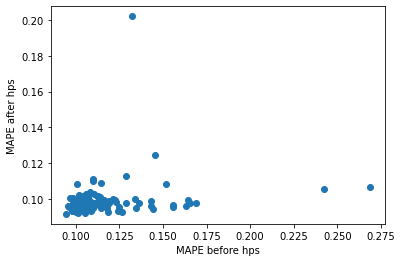

In [26]:
plt.scatter(before_array.mean(axis=1), after_array.mean(axis=1))
plt.ylabel("MAPE after hps")
plt.xlabel("MAPE before hps")

(0.08, 0.175)

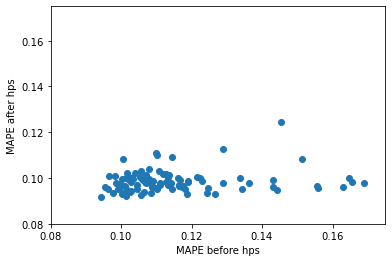

In [25]:
plt.scatter(before_array.mean(axis=1), after_array.mean(axis=1))
plt.ylabel("MAPE after hps")
plt.xlabel("MAPE before hps")
plt.xlim([0.08, 0.175])
plt.ylim([0.08, 0.175])

### The rank of different seeds before and after the optimization

In [30]:
before_rank = np.argsort(before_array.mean(axis=1).flatten())
after_rank = np.argsort(after_array.mean(axis=1).flatten())

In [48]:
before_rank

array([96, 32, 37, 61, 30,  8, 62, 86, 77, 59, 82, 87,  7, 92, 85, 21, 14,
       52, 83, 28, 44, 25, 57, 41, 89, 81, 91,  1, 27, 47, 50, 36,  4, 63,
       39, 23, 45,  0, 42, 70, 72, 60,  3, 22, 55, 20, 51,  2, 65, 76, 73,
       26, 16, 66, 33, 46, 24, 53, 19, 74, 54, 58, 34, 71, 29, 94, 80, 67,
       69, 12,  6, 78, 98, 99,  5, 38, 79, 49, 18, 40, 95, 31,  9, 35, 56,
       13, 10, 15, 68, 93, 84, 64, 11, 88, 43, 48, 90, 17, 75, 97])

In [49]:
after_rank

array([96, 14, 36, 95, 98, 82, 55, 18, 92, 30, 57, 23, 89, 93, 83, 71, 13,
       78, 86, 73, 47, 37, 65, 40, 88, 20, 12, 32, 59, 43, 15, 80,  6, 51,
       85, 11, 67, 27, 33, 54, 77, 34, 42, 10, 17, 66,  9, 62, 22,  0, 90,
        5, 24, 41,  2, 72, 49, 99, 39, 68, 25, 69, 28, 91, 60, 87, 63, 21,
       48, 94, 79, 81, 56, 45, 38, 19, 74, 50, 44,  8, 61, 58, 70, 53, 46,
        1, 52, 16,  4,  3, 75, 97,  7, 64, 29, 26, 76, 31, 84, 35])

In [54]:
plot = []
for rank in before_rank:
    index = np.where(rank == after_rank)
    plot.append(index[0][0])

([<matplotlib.axis.XTick at 0x7f2a0b85d090>,
 <a list of 20 Text major ticklabel objects>)

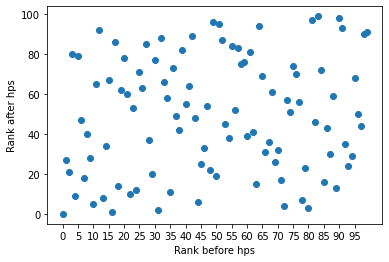

In [60]:
plt.scatter(np.arange(100), plot)
plt.ylabel("Rank after hps")
plt.xlabel("Rank before hps")
plt.xticks([i for i in range(0, 100, 5)])